PROJECT TITLE: A USAGE-BASED INSURANCE RISK ASSESSMENT MODEL FOR FLEET-MANAGED VEHICLES IN KENYA

UNIT NAME: PREDICTIVE AND OPTIMIZATION ANALYTICS (POA)

PROGRAM: MSC DATA SCIENCE

STUDENT NAME: RUTH KIRUKI WAMBUI 

STUDENT NUMBER: 54667 

Insurance transfers risk by providing financial compensation for losses or damages from events outside their control. Insurance companies assume these risks in exchange for a premium, which must be managed appropriately to earn a reasonable profit. Risk classification is a fundamental principle in this process, grouping individuals with similar traits into a large pool. In the auto insurance industry, insurers consider both driving-related and non-driving-related rating variables when pricing policies. Telematics, technology that gathers and transmits data from vehicles, assets, or equipment, is widely used in the automotive industry for fleet management, insurance, and navigation systems.

The primary goal is to assess factors influencing driver behavior, determine suitable metrics for insurance pricing, and evaluate the impact of UBI on insurance costs.

i) Identify the factors that influence a usage-based insurance model.

ii) Assess the laws and regulatory framework that surround the motor insurance industry.

iii) Create a study of the benefits of using a usage-based insurance model vis a vis the current model.

iv) Develop a usage-based insurance risk assessment model for the Easy Coach fleet in Kenya.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Loading the dataset

In [2]:
df= pd.read_csv("Driver Behavior Dataset.csv")

In [3]:
df.head(50)

,Date,ID,Unnamed: 2,Unnamed: 3,Name,Unnamed: 5,Unnamed: 6,Distance (Km),Unnamed: 8,Duration (HH:mm),...,Unnamed: 16,Idle time,Unnamed: 18,Acceleration,Deceleration,Curve acceleration,Legal speed exceed,Total,Ranking,Target Variable
0,1/31/2022,7090016095,NaN,NaN,ABUGA NAFTALI,NaN,NaN,"5,332.30",NaN,127:34:00,...,NaN,15,NaN,100,100,0,0,84,86,Good
1,1/31/2022,7090016184,NaN,NaN,ABWANZU VINCENT KLA,NaN,NaN,"9,536.50",NaN,171:10:00,...,NaN,16,NaN,97,97,0,0,79,133,Risky
2,1/31/2022,7090016225,NaN,NaN,AKHABALE FREDRICK,NaN,NaN,"5,528.30",NaN,126:38:00,...,NaN,16,NaN,96,96,0,0,84,86,Good
3,1/31/2022,7090016137,NaN,NaN,AKUTE ELIKANA JOSEPH,NaN,NaN,"1,078.40",NaN,26:20:00,...,NaN,46,NaN,99,99,0,0,80,126,Good
4,1/31/2022,7090016202,NaN,NaN,ALFRED M. ONDIEKI,NaN,NaN,"6,886.70",NaN,156:49:00,...,NaN,22,NaN,100,100,0,0,85,76,Good
5,1/31/2022,7090016025,NaN,NaN,ALILA A. FABIANO,NaN,NaN,"4,431.90",NaN,134:53:00,...,NaN,39,NaN,99,99,0,0,89,24,Good
6,1/31/2022,7090016372,NaN,NaN,AMDALA L. WYCLIFFE,NaN,NaN,"6,578.40",NaN,147:22:00,...,NaN,33,NaN,100,100,0,0,79,133,Risky
7,1/31/2022,7090016296,NaN,NaN,ANTONY M. NJOGU,NaN,NaN,"7,123.50",NaN,165:34:00,...,NaN,55,NaN,100,100,0,0,84,86,Good
8,1/31/2022,7090016374,NaN,NaN,ASIAGO O. DOMINIC,NaN,NaN,"6,208.60",NaN,136:26:00,...,NaN,22,NaN,100,100,0,0,79,133,Risky
9,1/31/2022,7090016243,NaN,NaN,ATEMO REUBEN,NaN,NaN,"5,592.30",NaN,89:59:00,...,NaN,26,NaN,98,98,0,0,83,100,Good


In [4]:
df.shape

(4296, 26)

In [5]:
df.columns

Index(['Date', 'ID', 'Unnamed: 2', 'Unnamed: 3', 'Name', 'Unnamed: 5',
       'Unnamed: 6', 'Distance (Km)', 'Unnamed: 8', 'Duration (HH:mm)',
       'Over speeding', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Over RPM', 'Unnamed: 15', 'Unnamed: 16', 'Idle time', 'Unnamed: 18',
       'Acceleration', 'Deceleration', 'Curve acceleration',
       'Legal speed exceed', 'Total', 'Ranking', 'Target Variable'],
      dtype='object')

Removing all columns with the value 'Unnamed'

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 8','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 15', 'Unnamed: 16',  'Unnamed: 18'], inplace=True)

df

,Date,ID,Name,Distance (Km),Duration (HH:mm),Over speeding,Over RPM,Idle time,Acceleration,Deceleration,Curve acceleration,Legal speed exceed,Total,Ranking,Target Variable
0,1/31/2022,7090016095,ABUGA NAFTALI,"5,332.30",127:34:00,96,100,15,100,100,0,0,84,86,Good
1,1/31/2022,7090016184,ABWANZU VINCENT KLA,"9,536.50",171:10:00,86,97,16,97,97,0,0,79,133,Risky
2,1/31/2022,7090016225,AKHABALE FREDRICK,"5,528.30",126:38:00,98,100,16,96,96,0,0,84,86,Good
3,1/31/2022,7090016137,AKUTE ELIKANA JOSEPH,"1,078.40",26:20:00,80,76,46,99,99,0,0,80,126,Good
4,1/31/2022,7090016202,ALFRED M. ONDIEKI,"6,886.70",156:49:00,95,100,22,100,100,0,0,85,76,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,2/29/2024,7090016215,WENDO PATRICK NGURUMANE,"3,349.70",89:28:00,85,100,82,100,100,0,0,92,45,Good
4292,2/29/2024,7090016408,WILLIAM MALEMO PPD,"1,802.80",89:01:00,97,100,99,98,99,0,0,98,6,Good
4293,2/29/2024,7090016419,WORKSHOP ERICK MARITIM,243.4,95:55:00,98,100,57,98,99,0,0,92,45,Good
4294,2/29/2024,7090016192,ZACHARIA MWAZOKA,"5,030.20",119:22:00,76,98,64,100,100,0,0,85,130,Good


Removal of all duplicates, nulls and rows with no data

In [7]:
df.duplicated().sum()

0

In [8]:
# check for missing values in the dataset
df.isnull().sum()

Date                  0
ID                    0
Name                  0
Distance (Km)         0
Duration (HH:mm)      0
Over speeding         0
Over RPM              0
Idle time             0
Acceleration          0
Deceleration          0
Curve acceleration    0
Legal speed exceed    0
Total                 0
Ranking               0
Target Variable       0
dtype: int64

In [9]:
df = df.loc[:, (df != 0).any(axis=0)]

# Display the resulting DataFrame
print(df)

           Date          ID                     Name Distance (Km)  \
0     1/31/2022  7090016095            ABUGA NAFTALI      5,332.30   
1     1/31/2022  7090016184      ABWANZU VINCENT KLA      9,536.50   
2     1/31/2022  7090016225       AKHABALE FREDRICK       5,528.30   
3     1/31/2022  7090016137    AKUTE  ELIKANA JOSEPH      1,078.40   
4     1/31/2022  7090016202        ALFRED M. ONDIEKI      6,886.70   
...         ...         ...                      ...           ...   
4291  2/29/2024  7090016215  WENDO PATRICK NGURUMANE      3,349.70   
4292  2/29/2024  7090016408      WILLIAM  MALEMO PPD      1,802.80   
4293  2/29/2024  7090016419   WORKSHOP ERICK MARITIM         243.4   
4294  2/29/2024  7090016192        ZACHARIA  MWAZOKA      5,030.20   
4295  2/29/2024  7090016230            ZETH R. OWIGO      4,166.70   

     Duration (HH:mm)  Over speeding  Over RPM  Idle time  Acceleration  \
0           127:34:00             96       100         15           100   
1        

Cleaning the Distance column into numbers so that it can be represented in the dataset description.

In [10]:
df.describe()

,ID,Over speeding,Over RPM,Idle time,Acceleration,Deceleration,Total,Ranking
count,4.296000e+03,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000
mean,7.010864e+09,90.853818,99.259311,43.243948,98.999767,99.136639,86.724860,78.008380
std,7.366891e+08,10.841135,2.662949,19.854514,2.481081,2.214819,5.331585,48.344779
min,0.000000e+00,0.000000,0.000000,0.000000,48.000000,63.000000,48.000000,1.000000
25%,7.090016e+09,86.000000,100.000000,30.000000,99.000000,99.000000,84.000000,36.000000
50%,7.090016e+09,94.000000,100.000000,40.000000,100.000000,100.000000,87.000000,74.000000
75%,7.090016e+09,99.000000,100.000000,53.000000,100.000000,100.000000,90.000000,120.000000
max,7.093002e+09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,187.000000


In [11]:
df.dtypes

Date                object
ID                   int64
Name                object
Distance (Km)       object
Duration (HH:mm)    object
Over speeding        int64
Over RPM             int64
Idle time            int64
Acceleration         int64
Deceleration         int64
Total                int64
Ranking              int64
Target Variable     object
dtype: object

In [12]:
def remove_commas(s):
    return s.replace(',', '')


df['Distance (Km)'] = df['Distance (Km)'].apply(remove_commas)
print(df)

           Date          ID                     Name Distance (Km)  \
0     1/31/2022  7090016095            ABUGA NAFTALI       5332.30   
1     1/31/2022  7090016184      ABWANZU VINCENT KLA       9536.50   
2     1/31/2022  7090016225       AKHABALE FREDRICK        5528.30   
3     1/31/2022  7090016137    AKUTE  ELIKANA JOSEPH       1078.40   
4     1/31/2022  7090016202        ALFRED M. ONDIEKI       6886.70   
...         ...         ...                      ...           ...   
4291  2/29/2024  7090016215  WENDO PATRICK NGURUMANE       3349.70   
4292  2/29/2024  7090016408      WILLIAM  MALEMO PPD       1802.80   
4293  2/29/2024  7090016419   WORKSHOP ERICK MARITIM         243.4   
4294  2/29/2024  7090016192        ZACHARIA  MWAZOKA       5030.20   
4295  2/29/2024  7090016230            ZETH R. OWIGO       4166.70   

     Duration (HH:mm)  Over speeding  Over RPM  Idle time  Acceleration  \
0           127:34:00             96       100         15           100   
1        

/var/folders/61/zssfzbk14gq_ktwnt04hy6_r0000gp/T/ipykernel_1936/39484823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance (Km)'] = df['Distance (Km)'].apply(remove_commas)


In [13]:
df['Distance (Km)']= df['Distance (Km)'].astype(float)

/var/folders/61/zssfzbk14gq_ktwnt04hy6_r0000gp/T/ipykernel_1936/2770662436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance (Km)']= df['Distance (Km)'].astype(float)


 The data contains metrics related to vehicle usage across a fleet of 4,296 entries. The metrics include distance driven, with an average of 5,375.65 km per vehicle/trip, suggesting some long-distance trips or accumulative recording, and an exceptionally high maximum distance of 119,902.5 km that might be an outlier. Other metrics such as over speeding and over RPM show high averages near the maximum possible value of 100, indicating high scores for these events. Idle time averages at 43.24, with a maximum of 100. Acceleration and deceleration metrics are consistently high, with median and 75th percentile values at the maximum, pointing towards high scores for speed changes. The 'Total' metric, possibly a composite score of all recorded events, averages at 86.72. The 'Ranking' metric ranges widely from 1 to 187, suggesting significant variability in driver behavior or vehicle performance.

In [14]:
df.describe()

,ID,Distance (Km),Over speeding,Over RPM,Idle time,Acceleration,Deceleration,Total,Ranking
count,4.296000e+03,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000
mean,7.010864e+09,5375.647486,90.853818,99.259311,43.243948,98.999767,99.136639,86.724860,78.008380
std,7.366891e+08,5264.789742,10.841135,2.662949,19.854514,2.481081,2.214819,5.331585,48.344779
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,48.000000,63.000000,48.000000,1.000000
25%,7.090016e+09,2624.350000,86.000000,100.000000,30.000000,99.000000,99.000000,84.000000,36.000000
50%,7.090016e+09,5632.400000,94.000000,100.000000,40.000000,100.000000,100.000000,87.000000,74.000000
75%,7.090016e+09,7345.775000,99.000000,100.000000,53.000000,100.000000,100.000000,90.000000,120.000000
max,7.093002e+09,119902.500000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,187.000000


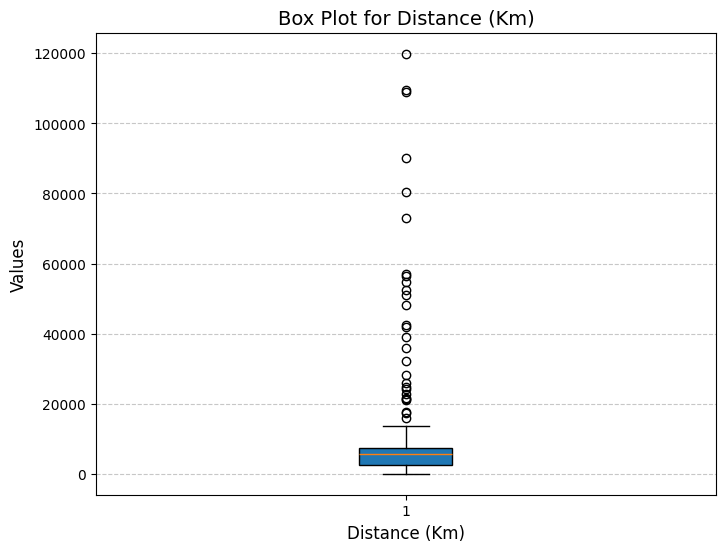

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Specify the column for which you want to create a box plot
column_name = 'Distance (Km)'

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name].dropna(), vert=True, patch_artist=True)

# Add labels and title
plt.title(f'Box Plot for {column_name}', fontsize=14)
plt.xlabel(column_name, fontsize=12)
plt.ylabel('Values', fontsize=12)

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
filtered_data_1 = df[df['Distance (Km)'] > 50000]

# Display the filtered rows
print(filtered_data_1)

# Optionally, save the filtered data to a new CSV file
filtered_data_1.to_csv('filtered_data_1.csv', index=False)

            Date  ID     Name  Distance (Km) Duration (HH:mm)  Over speeding  \
319    3/31/2022   0  ByPass         56980.3       2444:34:00             93   
470    4/30/2022   0  ByPass         90188.6       3123:01:00             89   
623    5/31/2022   0  ByPass         50950.2       2413:57:00             91   
1722  12/31/2022   0  ByPass         72989.9       2860:46:00             97   
1896   1/31/2023   0  ByPass        109004.1       3856:26:00             92   
2408   4/30/2023   0  ByPass         54792.1       2630:46:00             96   
3102   8/31/2023   0  ByPass         52564.7       2394:51:00             96   
3425  10/31/2023   0  ByPass         56424.8       2561:49:00             98   
3602  11/30/2023   0  ByPass        119902.5       3958:48:00             98   
3775  12/31/2023   0  ByPass        109578.2       3696:23:00             94   
3957   1/31/2024   0  ByPass         80433.1       2872:39:00             91   

      Over RPM  Idle time  Acceleration

In [17]:
filtered_data = df[df['Distance (Km)'] < 35]

# Display the filtered rows
print(filtered_data)

# Optionally, save the filtered data to a new CSV file
filtered_data.to_csv('filtered_data.csv', index=False)

           Date          ID                       Name  Distance (Km)  \
44    1/31/2022  7090016260       KHAN CHIEF INSPECTOR            0.1   
68    1/31/2022  7090016381    MECH ALFRED OCHIENG NKR            0.4   
70    1/31/2022  7090016358     MECH FREDRICK JUMA KSM           20.6   
72    1/31/2022  7090016278  MECH JOSEPHAT MUTISYA KKG           31.0   
75    1/31/2022  7090016263                  MECH KOLA           10.2   
...         ...         ...                        ...            ...   
4201  2/29/2024  7090016180               MECH kariuki            0.9   
4204  2/29/2024  7090017399           MECH KSM RAMBIRI           21.9   
4211  2/29/2024  7090016072  Mechanic KARIUKI FOR TEST            0.6   
4213  2/29/2024  7090016379             MUENDO KAMPALA            3.6   
4280  2/29/2024  7090000001             TAL TECHNICIAN           12.0   

     Duration (HH:mm)  Over speeding  Over RPM  Idle time  Acceleration  \
44              00:02            100       100  

In [18]:

# Filter rows based on the condition: 35 <= distance <= 50000
df = df[(df['Distance (Km)'] >= 35) & (df['Distance (Km)'] <= 50000)]

# Print the resulting DataFrame
print(df)

           Date          ID                     Name  Distance (Km)  \
0     1/31/2022  7090016095            ABUGA NAFTALI         5332.3   
1     1/31/2022  7090016184      ABWANZU VINCENT KLA         9536.5   
2     1/31/2022  7090016225       AKHABALE FREDRICK          5528.3   
3     1/31/2022  7090016137    AKUTE  ELIKANA JOSEPH         1078.4   
4     1/31/2022  7090016202        ALFRED M. ONDIEKI         6886.7   
...         ...         ...                      ...            ...   
4291  2/29/2024  7090016215  WENDO PATRICK NGURUMANE         3349.7   
4292  2/29/2024  7090016408      WILLIAM  MALEMO PPD         1802.8   
4293  2/29/2024  7090016419   WORKSHOP ERICK MARITIM          243.4   
4294  2/29/2024  7090016192        ZACHARIA  MWAZOKA         5030.2   
4295  2/29/2024  7090016230            ZETH R. OWIGO         4166.7   

     Duration (HH:mm)  Over speeding  Over RPM  Idle time  Acceleration  \
0           127:34:00             96       100         15           100 

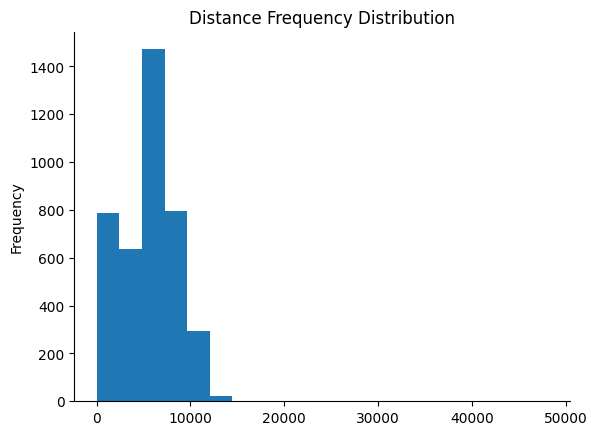

In [19]:
# Checking the distribution of distance.

from matplotlib import pyplot as plt
df['Distance (Km)'].plot(kind='hist', bins=20, title='Distance Frequency Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

There are outliers that exist in the dataset as can be seen from the distance travelled. This suggests that records of inspectors and mechanics may have been captured in the event of road tests and training and are removed from the dataset. 

<Figure size 1000x800 with 0 Axes>

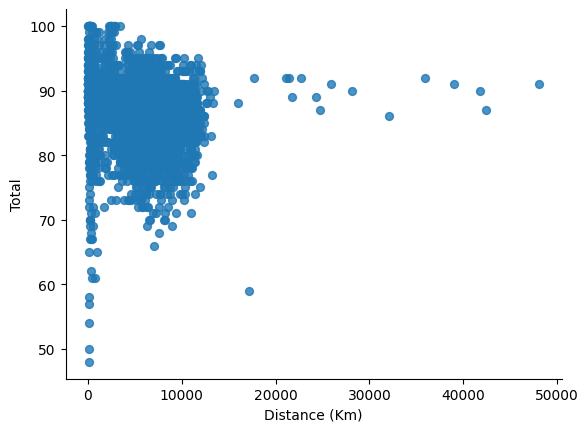

<Figure size 1000x800 with 0 Axes>

In [20]:

import matplotlib.pyplot as plt
df.plot.scatter(x='Distance (Km)', y='Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.figure(figsize=(10, 8))


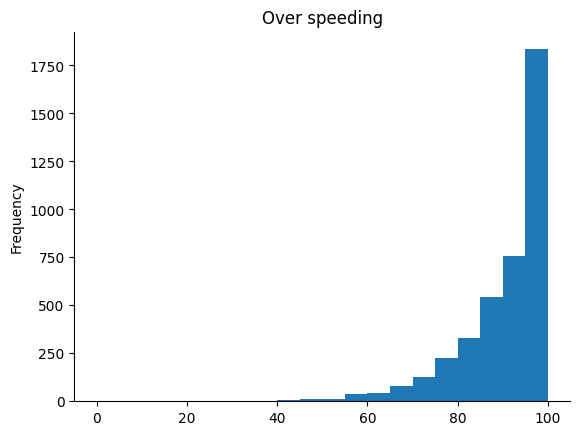

In [21]:
# @title Over speeding

from matplotlib import pyplot as plt
df['Over speeding'].plot(kind='hist', bins=20, title='Over speeding')
plt.gca().spines[['top', 'right',]].set_visible(False)

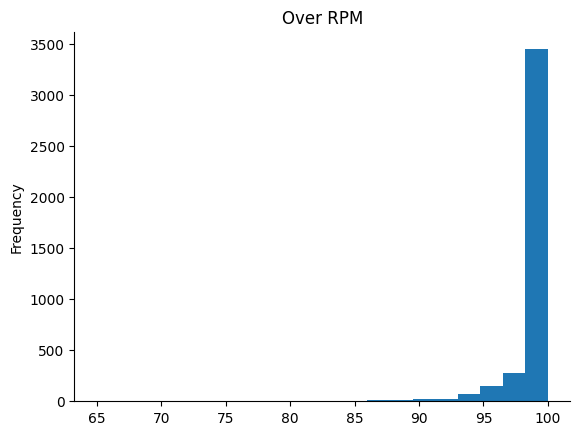

In [22]:
# @title Over RPM

from matplotlib import pyplot as plt
df['Over RPM'].plot(kind='hist', bins=20, title='Over RPM')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
df['Date'].head()

0    1/31/2022
1    1/31/2022
2    1/31/2022
3    1/31/2022
4    1/31/2022
Name: Date, dtype: object

The dates are cleaned to make sure that they are in the correct format and are further binned into quarters, months and years to facilitate further analysis. Column 'duration' is cleaned to represent time in hours and minutes format (HH:mm).

In [24]:
df['Date'].apply(lambda x: x.split('/')[0]).head()
df['Date'] = df['Date'].apply(lambda x: '-'.join(x.split('/')[::-1]))


In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%d-%m')
df['Date'].head()

0   2022-01-31
1   2022-01-31
2   2022-01-31
3   2022-01-31
4   2022-01-31
Name: Date, dtype: datetime64[ns]

In [26]:
df['Quarter_bin'] = pd.cut(df['Date'], bins=[pd.to_datetime('2022-01-31'),
                                         pd.to_datetime('2022-04-30'),
                                         pd.to_datetime('2022-07-31'),
                                         pd.to_datetime('2022-10-31'),
                                         pd.to_datetime('2023-01-31'),
                                         pd.to_datetime('2023-04-30'),
                                         pd.to_datetime('2023-07-31'),
                                         pd.to_datetime('2023-10-31'),
                                         pd.to_datetime('2024-01-31'),
                                         pd.to_datetime('2024-02-29')], include_lowest=True, labels=['Q1_2022', 'Q2_2022', 'Q3_2022', 'Q4_2022', 'Q1_2023', 'Q2_2023', 'Q3_2023', 'Q4_2023', 'Q1_2024'])

In [27]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [28]:
df

,Date,ID,Name,Distance (Km),Duration (HH:mm),Over speeding,Over RPM,Idle time,Acceleration,Deceleration,Total,Ranking,Target Variable,Quarter_bin,Month,Year
0,2022-01-31,7090016095,ABUGA NAFTALI,5332.3,127:34:00,96,100,15,100,100,84,86,Good,Q1_2022,1,2022
1,2022-01-31,7090016184,ABWANZU VINCENT KLA,9536.5,171:10:00,86,97,16,97,97,79,133,Risky,Q1_2022,1,2022
2,2022-01-31,7090016225,AKHABALE FREDRICK,5528.3,126:38:00,98,100,16,96,96,84,86,Good,Q1_2022,1,2022
3,2022-01-31,7090016137,AKUTE ELIKANA JOSEPH,1078.4,26:20:00,80,76,46,99,99,80,126,Good,Q1_2022,1,2022
4,2022-01-31,7090016202,ALFRED M. ONDIEKI,6886.7,156:49:00,95,100,22,100,100,85,76,Good,Q1_2022,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,2024-02-29,7090016215,WENDO PATRICK NGURUMANE,3349.7,89:28:00,85,100,82,100,100,92,45,Good,Q1_2024,2,2024
4292,2024-02-29,7090016408,WILLIAM MALEMO PPD,1802.8,89:01:00,97,100,99,98,99,98,6,Good,Q1_2024,2,2024
4293,2024-02-29,7090016419,WORKSHOP ERICK MARITIM,243.4,95:55:00,98,100,57,98,99,92,45,Good,Q1_2024,2,2024
4294,2024-02-29,7090016192,ZACHARIA MWAZOKA,5030.2,119:22:00,76,98,64,100,100,85,130,Good,Q1_2024,2,2024


In [29]:
def convert_duration(duration):
    try:
        # Ensure the value is a string before processing
        if isinstance(duration, str) and ':' in duration:
            # Split the duration string into hours, minutes, and seconds components
            components = duration.split(':')
            hours = float(components[0])
            minutes = float(components[1])
            # Check if the seconds component exists
            if len(components) == 3:
                seconds = float(components[2])
            else:
                seconds = 0
            # Calculate the total duration in hours
            return hours + (minutes / 60) + (seconds / 3600)
        elif isinstance(duration, (int, float)):
            # If the value is numeric, assume it is already in hours
            return duration
        else:
            # If the value is neither a string nor numeric, return None
            return None
    except ValueError:
        # Handle cases where the duration string cannot be converted to float
        return None

# Apply the function to the 'Duration (HH:mm:ss)' column in the DataFrame
df['Duration (HH:mm)'] = df['Duration (HH:mm)'].apply(convert_duration)
df

,Date,ID,Name,Distance (Km),Duration (HH:mm),Over speeding,Over RPM,Idle time,Acceleration,Deceleration,Total,Ranking,Target Variable,Quarter_bin,Month,Year
0,2022-01-31,7090016095,ABUGA NAFTALI,5332.3,127.566667,96,100,15,100,100,84,86,Good,Q1_2022,1,2022
1,2022-01-31,7090016184,ABWANZU VINCENT KLA,9536.5,171.166667,86,97,16,97,97,79,133,Risky,Q1_2022,1,2022
2,2022-01-31,7090016225,AKHABALE FREDRICK,5528.3,126.633333,98,100,16,96,96,84,86,Good,Q1_2022,1,2022
3,2022-01-31,7090016137,AKUTE ELIKANA JOSEPH,1078.4,26.333333,80,76,46,99,99,80,126,Good,Q1_2022,1,2022
4,2022-01-31,7090016202,ALFRED M. ONDIEKI,6886.7,156.816667,95,100,22,100,100,85,76,Good,Q1_2022,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,2024-02-29,7090016215,WENDO PATRICK NGURUMANE,3349.7,89.466667,85,100,82,100,100,92,45,Good,Q1_2024,2,2024
4292,2024-02-29,7090016408,WILLIAM MALEMO PPD,1802.8,89.016667,97,100,99,98,99,98,6,Good,Q1_2024,2,2024
4293,2024-02-29,7090016419,WORKSHOP ERICK MARITIM,243.4,95.916667,98,100,57,98,99,92,45,Good,Q1_2024,2,2024
4294,2024-02-29,7090016192,ZACHARIA MWAZOKA,5030.2,119.366667,76,98,64,100,100,85,130,Good,Q1_2024,2,2024


A review of the charts show that the dec and acc scores differ overtime for the drivers as time increases. 
This could be due to the seasonality in business for when the passengers increase maybe during the school 
holidays or when more people are travelling upcountry.This shows that they tend to overstretch their resources during August and September season when schools close and re-open.


In [30]:
import plotly.express as px

# Create an interactive histogram for the distribution of deceleration
fig = px.histogram(df, x='Deceleration', nbins=30, title='Distribution of Deceleration')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Deceleration',
    yaxis_title='Frequency',
    template='plotly_white',
    title_x=0.5
)

# Show the plot
fig.show()

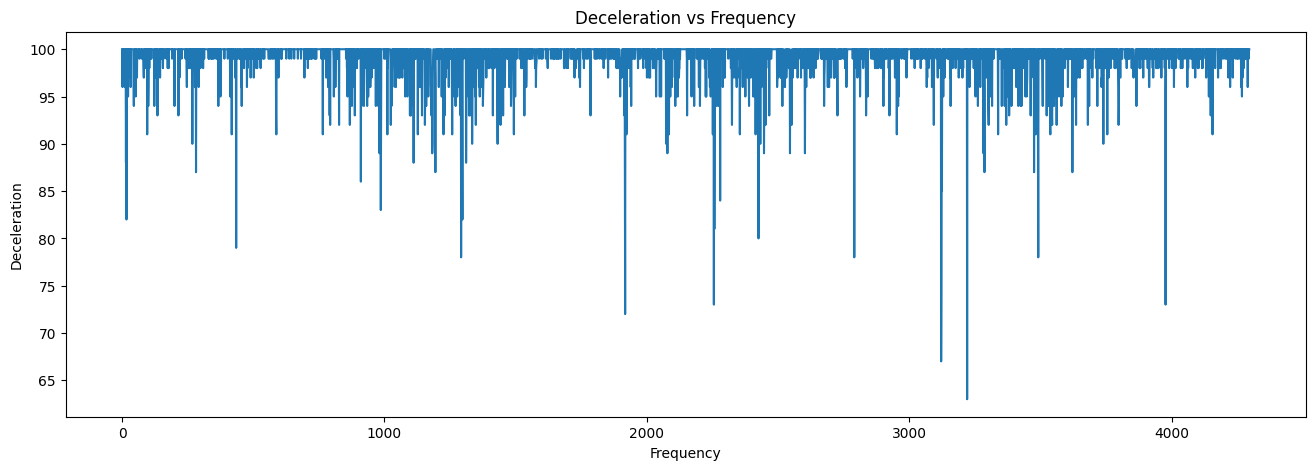

In [31]:
import matplotlib.pyplot as plt
df['Deceleration'].plot(figsize=(16, 5), title='Deceleration vs Frequency')
plt.ylabel('Deceleration')
plt.xlabel('Frequency')
plt.show()


In [32]:
# Plot the Distribution of 'Acceleration'

# Use matplotlib to plot the distribution of the 'Acceleration' column
# plt.figure(figsize=(10, 6))
# plt.hist(df['Acceleration'], bins=30, edgecolor='k', alpha=0.7)
# plt.title('Distribution of Acceleration')
# plt.xlabel('Acceleration')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

# Use plotly to create an interactive plot of the distribution of the 'Acceleration' column
fig = px.histogram(df, x='Acceleration', nbins=30, title='Distribution of Acceleration')
fig.update_layout(
    xaxis_title='Acceleration',
    yaxis_title='Frequency',
    bargap=0.2
)
fig.show()


In [33]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and it has 'Date' and 'Deceleration' columns
# First, we need to calculate the average deceleration scores for each date
df_avg_deceleration = df.groupby('Date', as_index=False)['Acceleration'].mean()

# Now, we can plot the average deceleration scores against date
fig = px.line(df_avg_deceleration, x='Date', y='Acceleration', title='Average Acceleration Scores Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Average Acceleration')
fig.show()

In [34]:
import plotly.express as px
import pandas as pd

def _plot_series(series, series_name, series_index=0):
    fig = px.line(series, x='Date', y='Acceleration', title=series_name)
    fig.update_layout(xaxis_title='Date', yaxis_title='Acceleration')
    fig.show()

df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, 'Acceleration Over Time')

In [35]:
import plotly.express as px
import pandas as pd

# First, we need to calculate the average acceleration scores for each date
df_avg = df.groupby('Date', as_index=False)['Deceleration'].mean()

# Then plot the average acceleration scores against date
fig = px.line(df_avg, x='Date', y='Deceleration', title='Average Deceleration Scores Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Average Deceleration')
fig.show()

In [36]:
import plotly.express as px
import pandas as pd

def _plot_series(series, series_name, series_index=0):
    fig = px.line(series, x='Date', y='Deceleration', title=series_name)
    fig.update_layout(xaxis_title='Date', yaxis_title='Deceleration')
    fig.show()

df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, 'Deceleration Over Time')

In [37]:
df.columns

Index(['Date', 'ID', 'Name', 'Distance (Km)', 'Duration (HH:mm)',
       'Over speeding', 'Over RPM', 'Idle time', 'Acceleration',
       'Deceleration', 'Total', 'Ranking', 'Target Variable', 'Quarter_bin',
       'Month', 'Year'],
      dtype='object')

In [38]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and it has 'Date' and 'Speeding' columns
# First, we need to calculate the average speeding scores for each date
df_avg_speeding = df.groupby('Date', as_index=False)['Over speeding'].mean()

# Now, we can plot the average speeding scores against date
fig_speeding = px.line(df_avg_speeding, x='Date', y='Over speeding', title='Average Speeding Scores Over Time')
fig_speeding.update_layout(xaxis_title='Date', yaxis_title='Average Speeding')
fig_speeding.show()

In [39]:
import pandas as pd

import plotly.express as px

# Assuming df is your DataFrame and it has 'Date' and 'Speeding' columns
# First, we need to calculate the average speeding scores for each date
df_avg_speeding = df.groupby('Date', as_index=False)['Over speeding'].mean()

# Now, we can plot the average speeding scores against date
fig_speeding = px.line(df_avg_speeding, x='Date', y='Over speeding', title='Average Speeding Scores Over Time')

# Update layout to increase the height of the graph
fig_speeding.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Speeding',
    height=700  # Increase the height of the graph
)

fig_speeding.show()

The scatter plot shows a positive correlation between Acc. and Dec., meaning that as Acc. increases, Dec. also tends to increase. This suggests that drivers who have higher acceleration tend to have higher deceleration as well.

 This plot indicates that drivers with good acceleration also tend to have good deceleration, which is generally considered to be a good driving behavior. 

In [40]:
import plotly.express as px

# Assuming df is your DataFrame and it has 'Acceleration' and 'Deceleration' columns
fig = px.scatter(df, x='Acceleration', y='Deceleration', title='Acc. vs Dec.')
fig.update_layout(
    xaxis_title='Acceleration',
    yaxis_title='Deceleration',
    height=600  # Increase the height of the graph
)
fig.show()

The graph shows the distribution of idle time across the dataset. The majority of the data points are concentrated in the higher range of the scale, indicating that drivers generally have good idle time behavior. This suggests that drivers are not spending excessive amounts of time idling, which is considered to be a good driving practice.

The scatter plot shows the relationship between idle time and acceleration for different drivers.
The plot shows that there is a weak positive correlation between idle time and acceleration. This means that drivers who spend more time idling tend to accelerate more quickly. It could be that drivers who spend more time in traffic are more likely to idle and accelerate quickly.

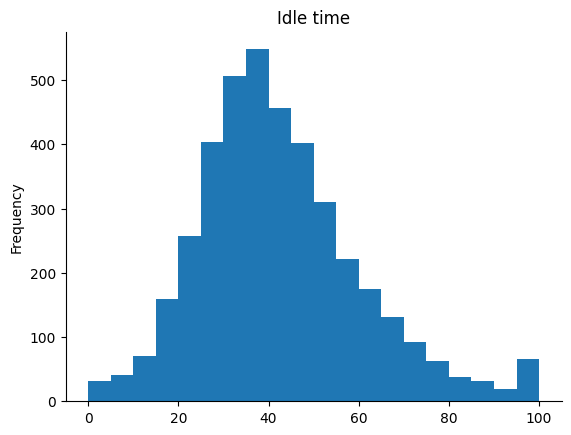

In [41]:

from matplotlib import pyplot as plt
df['Idle time'].plot(kind='hist', bins=20, title='Idle time')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
import plotly.express as px

# Create an interactive line plot for 'Idle time'
fig = px.line(df, y='Idle time', title='Distribution of Idle Time Scores')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Index',
    yaxis_title='Idle Time',
    template='plotly_white',
    title_x=0.5
)

# Show the interactive plot
fig.show()

In [43]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and it has 'Date' and 'IdleTime' columns
# First, we need to calculate the average idle time for each date
df_avg_idle_time = df.groupby('Date', as_index=False)['Idle time'].mean()

# Now, we can plot the average idle time against date
fig = px.line(df_avg_idle_time, x='Date', y='Idle time', title='Average Idle Time Scores Over Time', markers=True)

# Update layout to add more interactivity
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Idle Time',
    hovermode='x unified',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

fig.show()

In [44]:
import pandas as pd

import plotly.express as px

# Assuming df is your DataFrame and it has 'Date' and 'IdleTime' columns
# First, we need to calculate the average idle time for each date
df_avg_idle_time = df.groupby('Date', as_index=False)['Idle time'].mean()

# Now, we can plot the average idle time against date
fig = px.line(df_avg_idle_time, x='Date', y='Idle time', title='Average Idle Time Scores Over Time', markers=True)

# Update layout to remove slider and increase height
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Idle Time',
    hovermode='x unified',
    height=600  # Increase the height of the graph
)

fig.show()

In [45]:
import plotly.express as px

# Assuming df is your DataFrame and it has 'Idle time' and 'Acceleration' columns
fig = px.scatter(df, x='Idle time', y='Acceleration', title='Idle Time vs Acceleration', opacity=0.8)

# Update layout to add more interactivity and increase height
fig.update_layout(
    xaxis_title='Idle Time',
    yaxis_title='Acceleration',
    hovermode='closest',
    height=600  # Increase the height of the graph
)

# Hide the top and right spines
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show()

/var/folders/61/zssfzbk14gq_ktwnt04hy6_r0000gp/T/ipykernel_1936/1401652005.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



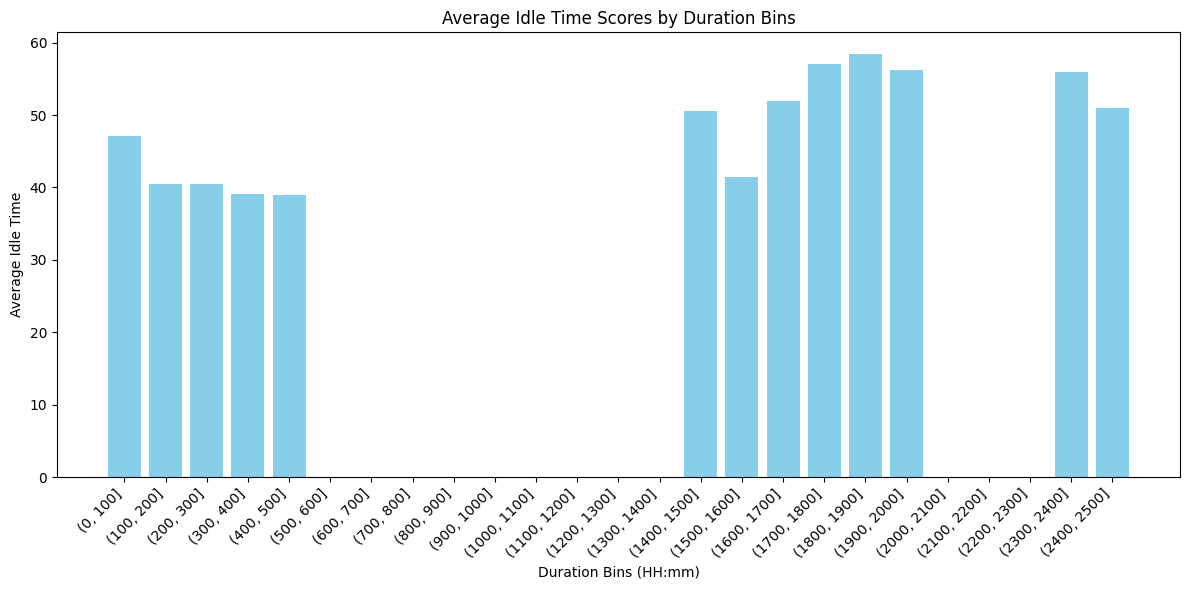

In [46]:
# Bin the 'Duration (HH:mm)' column into bins of 10
df['Duration_bin'] = pd.cut(df['Duration (HH:mm)'], bins=range(0, int(df['Duration (HH:mm)'].max()) + 100, 100))

# Calculate the average idle time for each duration bin
avg_idle_time_by_duration_bin = df.groupby('Duration_bin')['Idle time'].mean().reset_index()

# Plot the average idle time against duration bins
plt.figure(figsize=(12, 6))
plt.bar(avg_idle_time_by_duration_bin['Duration_bin'].astype(str), avg_idle_time_by_duration_bin['Idle time'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Duration Bins (HH:mm)')
plt.ylabel('Average Idle Time')
plt.title('Average Idle Time Scores by Duration Bins')
plt.tight_layout()
plt.show()

In [47]:
import plotly.express as px

# Assuming df is your DataFrame and it has 'Duration (HH:mm)', 'Idle time', and 'ID' columns
fig = px.scatter(df, x='Duration (HH:mm)', y='Idle time', color='ID', title='Duration vs Idle Time Scores')

# Update layout to add more interactivity
fig.update_layout(
    xaxis_title='Duration (HH:mm)',
    yaxis_title='Idle Time',
    hovermode='closest'
)

fig.show()

Observations from the Graph:
The X-axis represents Duration (HH:mm).
The Y-axis represents Idle Time Scores.
The color gradient represents ID values, ranging from dark blue (low ID) to bright yellow (high ID).

Trend: 

There may be a relationship between idle time scores and trip duration:

Drivers with longer trip durations might have higher idle time scores, possibly because longer trips include more scheduled breaks or waiting times.

Conversely, drivers with shorter trip durations might have lower idle time scores, as their shifts are more compact.

Outliers: 

If there are data points where idle time scores are low but trip durations are high (or vice versa), these could indicate:

Efficient drivers who minimize idle time even during long trips.

Inefficient scheduling where drivers have excessive idle time despite short trips.


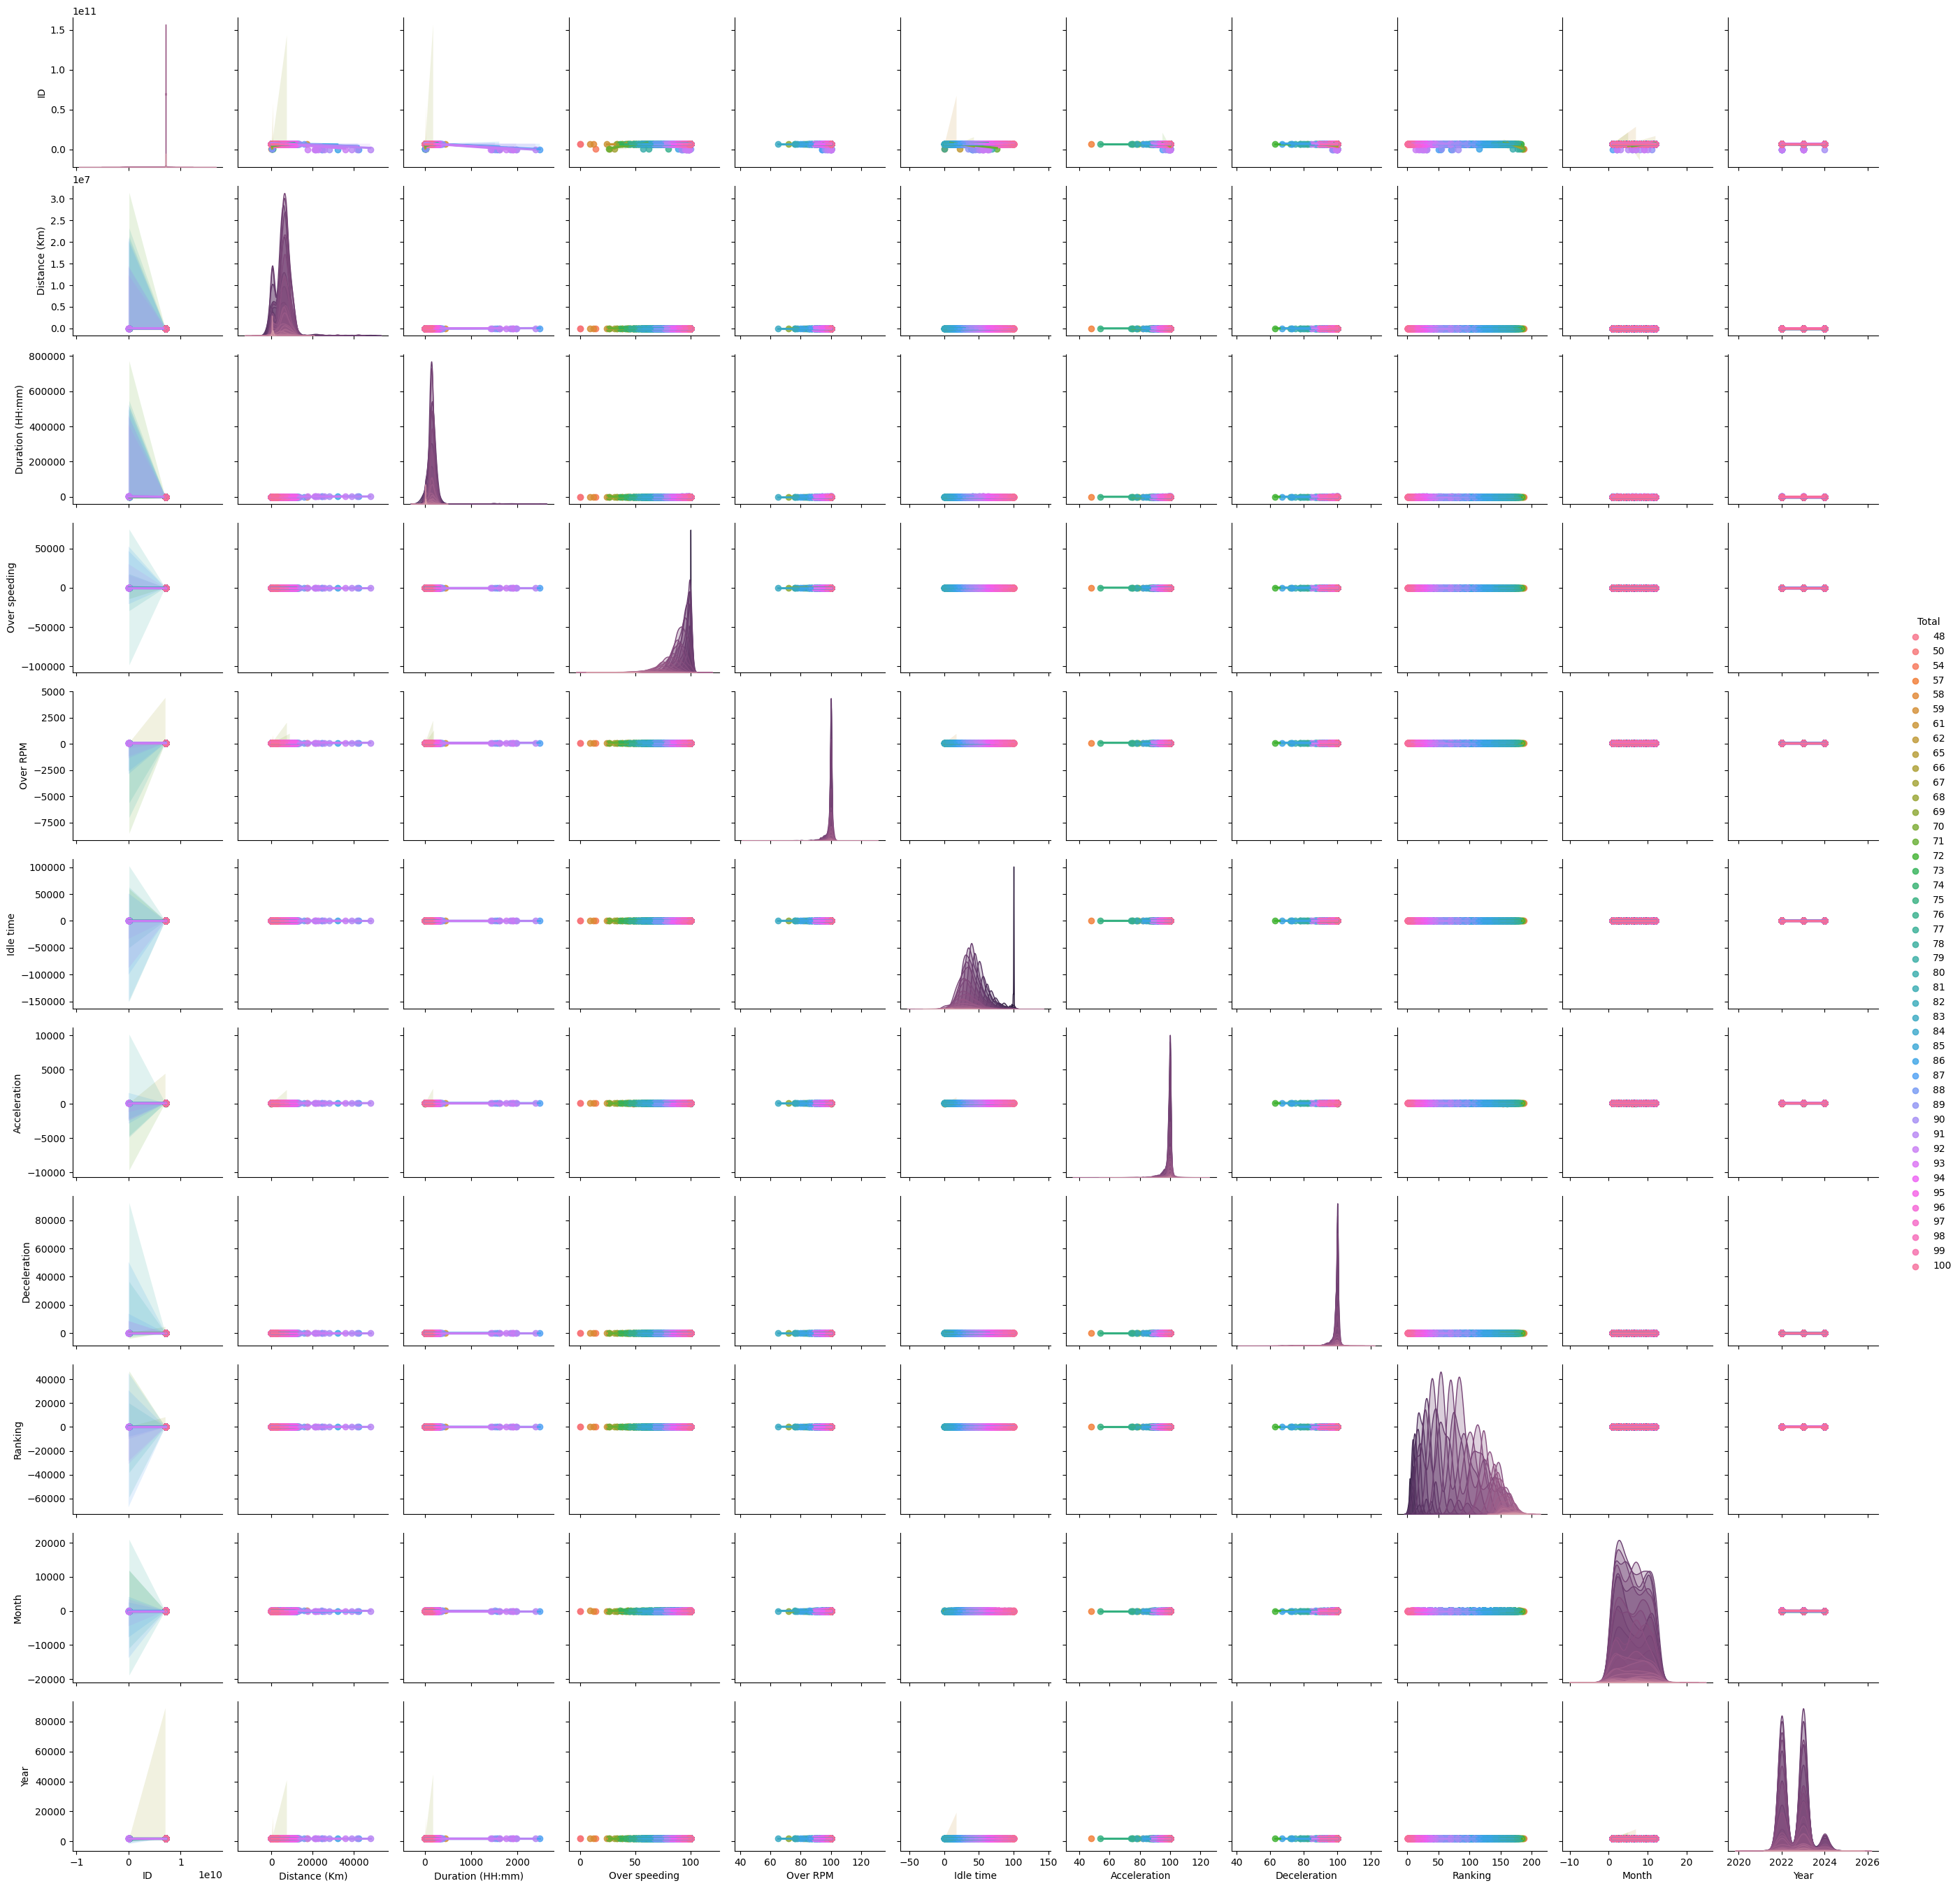

In [48]:
sns.pairplot(df, hue='Total', kind='reg')
plt.show()

In [49]:
df.to_csv("/Users/wkiruki/Documents/Dissertation 7 2 2/cleaned_dataset.csv", index=False)

print(df)

           Date          ID                     Name  Distance (Km)  \
0    2022-01-31  7090016095            ABUGA NAFTALI         5332.3   
1    2022-01-31  7090016184      ABWANZU VINCENT KLA         9536.5   
2    2022-01-31  7090016225       AKHABALE FREDRICK          5528.3   
3    2022-01-31  7090016137    AKUTE  ELIKANA JOSEPH         1078.4   
4    2022-01-31  7090016202        ALFRED M. ONDIEKI         6886.7   
...         ...         ...                      ...            ...   
4291 2024-02-29  7090016215  WENDO PATRICK NGURUMANE         3349.7   
4292 2024-02-29  7090016408      WILLIAM  MALEMO PPD         1802.8   
4293 2024-02-29  7090016419   WORKSHOP ERICK MARITIM          243.4   
4294 2024-02-29  7090016192        ZACHARIA  MWAZOKA         5030.2   
4295 2024-02-29  7090016230            ZETH R. OWIGO         4166.7   

      Duration (HH:mm)  Over speeding  Over RPM  Idle time  Acceleration  \
0           127.566667             96       100         15           10

                        ID  Distance (Km)  Duration (HH:mm)  Over speeding  \
ID                1.000000      -0.303088         -0.631519       0.067802   
Distance (Km)    -0.303088       1.000000          0.783997      -0.113524   
Duration (HH:mm) -0.631519       0.783997          1.000000       0.010682   
Over speeding     0.067802      -0.113524          0.010682       1.000000   
Over RPM          0.011255      -0.085241         -0.038877       0.100141   
Idle time        -0.021450      -0.125119         -0.039786       0.037846   
Acceleration     -0.012911       0.064847          0.035582       0.006232   
Deceleration     -0.016895       0.033868          0.049166       0.117943   
Total             0.035501      -0.163206         -0.014841       0.771965   
Ranking          -0.003465       0.167254          0.001064      -0.673214   
Month             0.004793       0.122818          0.096966       0.025463   
Year             -0.007016       0.004908          0.004089     

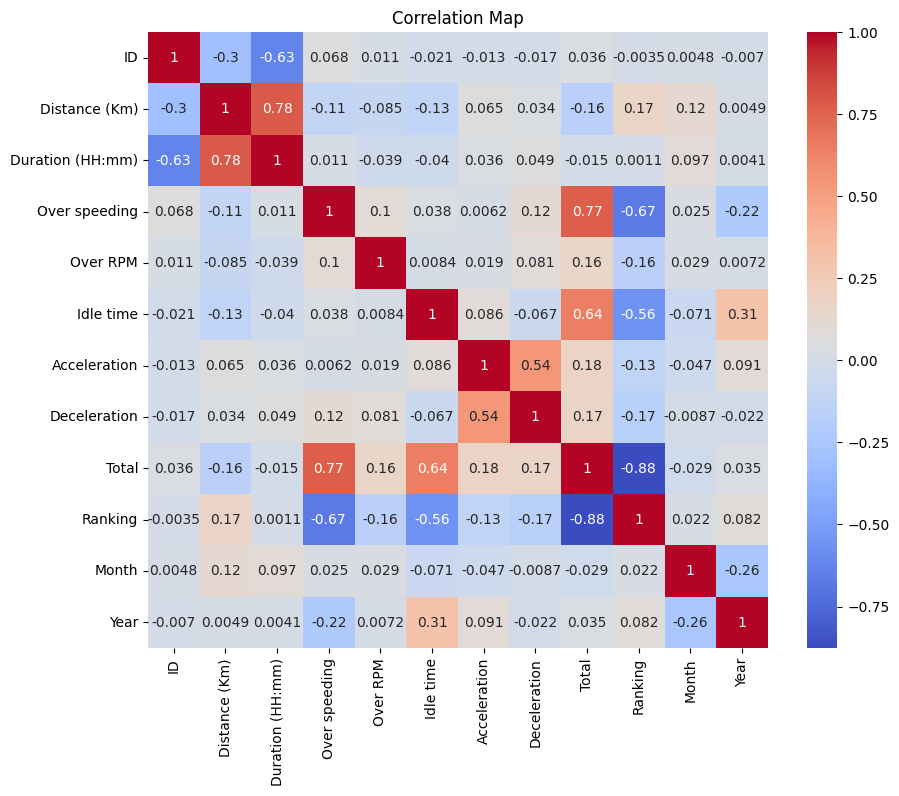

In [50]:

numerical_columns = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

# Display correlation matrix
print(correlation_matrix)

# Draw a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()


The correlation map shows the correlation coefficients between different variables in the dataset. The correlation coefficient measures the strength and direction of the linear relationship between two variables.

In this case, the correlation map shows that:

Over Speeding and Idle Time are the most significant contributors to the Total score and Target Variable, but they negatively impact Ranking.

Distance and Duration are strongly correlated, as expected, but they have minimal impact on other variables like Idle Time or Over Speeding.

Ranking is heavily influenced by Over Speeding, and Idle Time, with higher scores in these areas leading to poorer rankings.

Acceleration and Deceleration have minor impacts on the overall score and target variable.

Actionable Recommendations:
Reduce Over Speeding: Since over-speeding strongly impacts the Total score and Target Variable but negatively affects Ranking, efforts to reduce over-speeding could improve overall performance and rankings.

Optimize Idle Time: High idle time contributes to the Total score and Target Variable. Reducing idle time through better scheduling or operational efficiency could improve rankings.

Monitor Acceleration and Deceleration: While these variables have minor impacts, smoother driving (reducing harsh acceleration and deceleration) could still contribute to better performance and a reduction in repairs.





Feature Extraction and Modelling 

In [51]:
#checking the distribution of the data and/or the skewness
print('Good', round(df['Target Variable'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Risky', round(df['Target Variable'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Good 91.94 % of the dataset
Risky 8.06 % of the dataset


/var/folders/61/zssfzbk14gq_ktwnt04hy6_r0000gp/T/ipykernel_1936/3107216321.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/61/zssfzbk14gq_ktwnt04hy6_r0000gp/T/ipykernel_1936/3107216321.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [52]:
import plotly.express as px

# Define custom colors
colors = ["#FF6B6B", "#4CAF50"]  # Red for Risky, Green for Good

# Replace target variable labels
df_labeled = df.copy()
df_labeled["Target Variable"] = df_labeled["Target Variable"].replace({0: "Risky", 1: "Good"})

# Calculate normalized percentages
df_normalized = df_labeled["Target Variable"].value_counts(normalize=True).reset_index()
df_normalized.columns = ["Target Variable", "Percentage"]
df_normalized["Percentage"] *= 100  # Convert to percentage

# Create an interactive bar chart with percentages
fig = px.bar(
    df_normalized, 
    x="Target Variable", 
    y="Percentage", 
    color="Target Variable",  # Color bars by category
    title="📊 Normalized Target Distributions (Risky vs. Good)", 
    labels={"Target Variable": "Target Class", "Percentage": "Percentage (%)"},  
    text_auto=".2f",  # Display percentages on bars with 2 decimal places
    color_discrete_sequence=colors
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Target Class",
    yaxis_title="Percentage (%)",
    bargap=0.2,  # Adjust spacing between bars
    showlegend=False  # Remove unnecessary legend
)

# Show the interactive plot
fig.show()


The majority of dataset is composed of 'Good' attributes and this shows that the dataset is imbalanced. Using this dataframe for the predictive models and analysis could lead to numerous errors. Moreover, the algorithms might overfit, as they might incorrectly assume that the majority of the driving behavior is good. To balance the dataset SMOTE was used so that we can get conclusive results from the model.

In [53]:
df['Target Variable'] = df['Target Variable'].replace({'Good': 1, 'Risky': 0})


/var/folders/61/zssfzbk14gq_ktwnt04hy6_r0000gp/T/ipykernel_1936/154418191.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [54]:
df = df[df['Target Variable'].notna()]

In [55]:
x = df.drop(columns= ['Target Variable','Date', 'ID', 'Name','Total','Ranking','Month', 'Year' , 'Quarter_bin', 'Duration_bin'])
Y = df['Target Variable']

In [56]:
 pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)

In [58]:
x_train.shape

(2815, 7)

The analysis uses three machine learning techniques: logistic regression, random forest, and gradient-boosting trees. Logistic regression is commonly used in the insurance sector for binary classification, but its ability to capture complex non-linear interactions is limited. To overcome this, the study incorporates advanced techniques like random forests and gradient boosting trees. Random forests overcome constraints of individual decision trees and Gaussian boosting trees generate prediction models.

In [59]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
#logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(x_train, y_train.ravel()) 
  
predictions = lr.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 


# Calculate accuracy for Voting Classifier
accuracy_lr = accuracy_score(y_test, predictions)
print("Voting Classifier Accuracy:", accuracy_lr)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.99      0.99      0.99      1097

    accuracy                           0.98      1207
   macro avg       0.94      0.92      0.93      1207
weighted avg       0.98      0.98      0.98      1207

Voting Classifier Accuracy: 0.9768019884009942


/var/folders/61/zssfzbk14gq_ktwnt04hy6_r0000gp/T/ipykernel_1936/1325764942.py:9: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [60]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0))) 


Before OverSampling, counts of label '1': 2601
Before OverSampling, counts of label '0': 214 

After OverSampling, the shape of train_X: (5202, 7)
After OverSampling, the shape of train_y: (5202,) 

After OverSampling, counts of label '1': 2601
After OverSampling, counts of label '0': 2601


In [61]:
X_train_resampled.shape

(5202, 7)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.metrics import accuracy_score


clf1 =  LogisticRegression()
clf2 = RandomForestClassifier()

classifier_list = [clf1, clf2]
classifier_name = ['Logistic Regression','Random Forest']

for clf , name in zip(classifier_list, classifier_name):
  clf.fit(X_train_resampled, y_train_resampled)

  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f'Accuracy:{accuracy}, name of model {name}')

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1),
                                          ('rf', clf2)],
                                           voting='hard',weights=[1, 2])

# Train the Voting Classifier
voting_clf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_voting = voting_clf.predict(x_test)

# Calculate accuracy for Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)

Accuracy:0.9502899751449876, name of model Logistic Regression


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy:0.9784589892294946, name of model Random Forest


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Voting Classifier Accuracy: 0.9751449875724938


In [63]:
pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [64]:
import xgboost as xgb
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

#X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

# Instantiate an XGBoost classifier
clf = xgb.XGBClassifier()

# Train the classifier on the training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred_ensemble = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_ensemble) 
print(accuracy)


print(classification_report(y_test, y_pred_ensemble)) 

0.9875724937862469
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       110
           1       1.00      0.99      0.99      1097

    accuracy                           0.99      1207
   macro avg       0.95      0.98      0.96      1207
weighted avg       0.99      0.99      0.99      1207



In [65]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)

The XGBoost model was chosen as the best performing model in a dataset involving driving behaviors. The model's accuracy rate was 99.25%, indicating a close alignment between the model's predictions and the actual driving behaviors. Additional evaluative metrics, such as precision, recall, and F1-score, were used to assess its efficacy. Precision scores of 0.85 for risky driving and 0.99 for good driving indicated high precision in forecasting both behaviors. Recall scores of 0.92 for risky driving and 0.99 for good driving indicated a significant portion of instances from both classes. The F1-score of 0.88 for risky driving and 0.99 for good driving indicated a balance between minimizing false positives and false negatives 

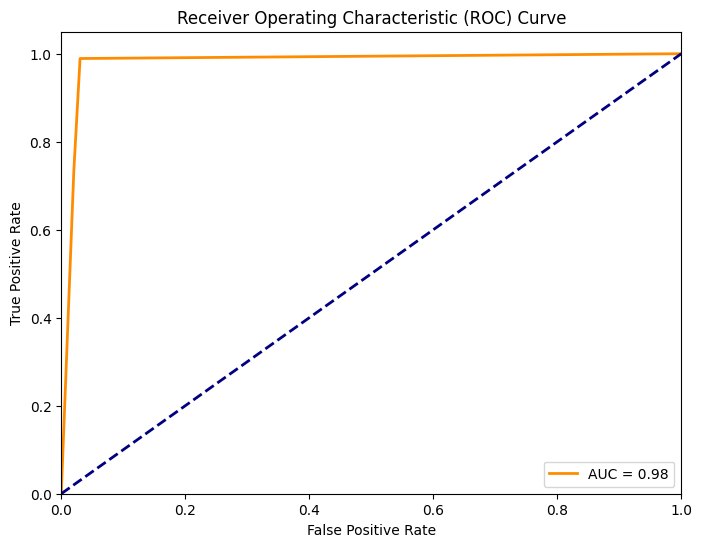

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ensemble)
roc_auc = auc(fpr, tpr)


# Increase the number of thresholds for smoother curve
smooth_fpr = np.linspace(0, 1, 100)
smooth_tpr = np.interp(smooth_fpr, fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(smooth_fpr, smooth_tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Feature Importance and model explainability which is also employed in the deployment.

In [67]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(x_test)




In summary:

Features like Over speeding and Idle time are the most critical drivers of the model’s decision-making.

High feature values (red dots) typically correspond to higher SHAP values (positive impact on prediction).

The visualization helps identify where targeted interventions (e.g., reducing over speeding behavior) might have the greatest effect.

Variable Importance Plot - Global Interpretation


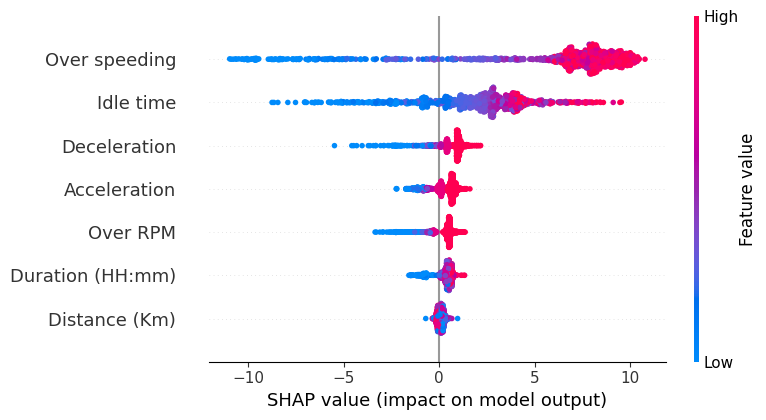

In [68]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, x_test)